# レッスン の概要

ArcGIS Notebooks の Advanced ランタイムには [```arcpy```](https://pro.arcgis.com/en/pro-app/arcpy/get-started/what-is-arcpy-.htm) が含まれており、そのArcGIS Python サイト パッケージはPython で地理データの解析、データ変換、データ管理、およびマップ自動化を実行するために便利で生産的な方法を提供しています。これにより、ArcGIS Pro で使用するのと同じジオプロセシング ツールにアクセスすることができます。**Advanced** ランタイムを使用すると **.05クレジット/分** 、つまり **3クレジット/時間** を消費します。Advanced ランタイムは、```arcpy``` を必要とするタスクがあることがわかっている場合に選択する必要があります。

このレッスンでは、ArcGIS Notebooks で ```arcpy``` を使用する方法と、arcpy ではなく [```arcgis```](https://pro.arcgis.com/en/pro-app/latest/arcpy/get-started/arcgis-api-for-python.htm) を使用する場合について学習します。ArcGIS Notebooks にファイル ジオデータベース をアップロードする方法、ArcGIS Notebooks でワークスペースを使用する方法、および ArcGIS Notebooks でファイル ジオデータベースのデータをマップ上に可視化する方法について学びます。このノートブックにとどまり、各ステップの下にある新しいセルにコードを入力してください。
このノートブックには、既存のセルを表示・非表示にする機能があります。回答を非表示にするには、[セットアップ](#setup) の指示に従ってください。

このレッスンを通して、次のような方法を学びます。

* [セットアップ](#setup)
* [ArcGIS Notebooks にジオデータベースをアップロード](#upload-gdb)
* [ジオデータベースの解凍](#unzip)
* [デフォルト ワークスペースの設定](#set-workspace)
* [新規にファイル ジオデータベースを作成](#create-gdb)
* [マップ上にフィーチャを可視化](#viz-features)
* [```arcpy``` を使ったフィーチャの結合](#join-arcpy)
* [```arcgis``` を使ったフィーチャの結合](#join-arcgis)
* [```arcpy``` でジオメトリの最小範囲を作成](#mbg-arcpy)
* [（オプション）チャレンジ](#challenge)

# セットアップ <a class="anchor" id="setup"></a>

1. このレッスンで使用するデータは、[はじめての ArcGIS Pro](https://learn.arcgis.com/ja/projects/get-started-with-arcgis-pro/) のレッスンで使用するデータと同じです。このレッスンを始める前に、[zip 形式で圧縮された  **Singapore_Data_GDB**](https://arcgis.com/sharing/rest/content/items/42120b93150b470ca8d191347110cdb0/data) をダウンロードしてください。ノートブック で使用するために zip ファイルをアップロードするので、解凍しないでください。
このジオデータベースには、**Singapore_Rail_lines**、**Singapore_Rail_Stations**、**Singapore_Tourist_Attractions** というフィーチャクラスが含まれています。
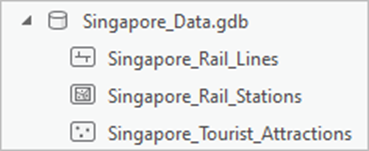

2. 下のセルを実行すると、答えが隠れます。

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Come back to this cell and click <a href="javascript:code_toggle()">Show Answers</a> <a class="anchor" id="show_answers"></a> to see what the code should look like.''')

# ArcGIS Notebooks にジオデータベースをアップロード <a class="anchor" id="upload-gdb"></a>

1. ArcGIS Notebooks でジオデータベース内のフィーチャクラスを操作するには、フィーチャクラスを zip 圧縮したジオデータベースを ArcGIS Notebook の **Files (ファイル)** エリアにアップロードする必要があります。まず、**Files (ファイル)** をクリックします。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/12d4a9c9430f464e90ae330363123262/data" width="400px" />

2. **Files (ファイル)** を開くと、ウィンドウの下部に、"Uploads are not supported in this folder.（このフォルダーでは、アップロードはサポートされていません。）"のメッセージが表示されています。ArcGIS Notebooks にデータをアップロードするには、**home** フォルダーに移動する必要があります。**home** をクリックして、**home** フォルダーに移動します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/c46314f5136f433ebd0a7debd6437b1a/data" width="300px" />


**home** フォルダーに一度もファイルをアップロードしたことがない場合、**This directory is empty.（このディレクトリは空です。）** と表示されます。以前ファイルをアップロードしたことがある場合、そのディレクトリにそれらのファイルやフォルダーが表示されます。  

**home** フォルダーは、あなたのノートブックで共有されるフォルダーです。このフォルダーやフォルダーに追加したデータは、すべてのノートブックで利用可能です。

3. このフォルダーにファイルをアップロードする前に、さまざまなオペレーティング システムの操作を可能にする ```os``` Python モジュールをインポートします。これを使用して、このレッスンで使用する zip 形式のジオデータベースをアップロードするためのフォルダーを作成します。このフォルダーは ***using_arcpy_lesson*** と名付けます。まず、```os``` をインポートしてください。

もし、答えを隠したければ、この下にセルを挿入して、 ```os```  モジュールをインポートするコードを追加し、セルを実行してください。

コードを見る必要がある場合は、レッスンの最初までスクロールして、[**Show Answers**] (#show_answers) リンクをクリックします。

In [ ]:
import os

4. この行の下にあるコード セルで、ディレクトリを定義します。```home_dir```、 ```new_dirname```、 ```lesson_dir``` の3つの変数を作成します。  
```home_dir``` を ```'/arcgis/home'``` に設定します。  
```new_dirname``` にはこれから作成するディレクトリ名の ```'using_arcpy_lesson'``` を設定します。    
```os.path.join``` を使って ```home_dir``` と ```new_dirname``` を ```lesson_dir``` に結合します。

In [ ]:
home_dir = '/arcgis/home'
new_dirname = 'using_arcpy_lesson'
lesson_dir = os.path.join(home_dir, new_dirname)

5. [```os.mkdir```](https://docs.python.org/3/library/os.html?highlight=mkdir#os.mkdir) を使ってフォルダーを作成します。

In [ ]:
os.mkdir(lesson_dir)

6. using_arcpy_lesson をクリックして、ディレクトリを変更します。必要に応じて、home ディレクトリを再度クリックし、内容を更新してください。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/b819b921b98e43b8beeb825cd70e5e06/data" width="300px" />  


7.  次に、**Singapore_Data.gdb.zip** を **using_arcpy_lesson** フォルダーにアップロードしてください。**Choose File (ファイルの選択)** をクリックし、**Upload (アップロード)** をクリックします。

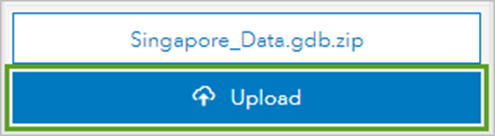

zip アーカイブのアップロードに 1 分ほどかかることがあります。アップロードが完了すると、**using_arcpy_lesson** フォルダーに **Singapore_Data.gdb.zip** が表示されます。

# ジオデータベースの解凍 <a class="anchor" id="unzip"></a>

ArcGIS Notebooks に zip 圧縮されたジオデータベースをアップロードしたので、ジオデータベースに含まれるフィーチャクラスを操作するために、ジオデータベースを解凍する必要があります。その操作には、Python の ```zipfile``` モジュールを使用することができます。

1. まず ```zipfile``` をインポートします。

In [ ]:
import zipfile

2. **Singapore_Data.gdb.zip** の横にある追加ボタンをクリックし、zip アーカイブをノートブックに追加します。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/36cf211b78474d379c27b7f01ef89777/data" width="300px" />

In [ ]:
dataset = '/arcgis/home/using_arcpy_lesson/Singapore_Data.gdb.zip'

3. セルを実行します。

4. ```zipfile``` を使ってデータセットを解凍します。```zip_ref``` という名前の変数を作成します。この値に ```zipfile.ZipFile(dataset, 'r')``` を設定して、セルを実行します。

In [ ]:
zip_ref = zipfile.ZipFile(dataset, 'r')

5. ```zip_ref.extractall(lesson_dir)``` を呼んで、データセットを抽出します。

In [ ]:
zip_ref.extractall(lesson_dir)

6.**Files (ファイル)** ペインでフォルダーをクリックすると、抽出したジオデータベースが表示されます。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/3ae19f5272bf4264af59e225754bd5f2/data" width="300px" />

# デフォルト ワークスペースを設定 <a class="anchor" id="set-workspace"></a>

デフォルト ワークスペースは、デスクトップ GIS では一般的な機能です。これはパスが指定されていない場合、データの読み込みや書き込みが行われる場所です。デスクトップ や ArcGIS Proで ```arcpy``` を使用する場合、デフォルト ワークスペースは既に設定されています。 ArcGIS Notebooks で ```arcpy``` を使用する場合、デフォルト ワークスペースは設定されていません。


1. ```arcpy``` のインポート

In [ ]:
import arcpy

2. arcpy をインポートして、workspace 環境変数を出力して、workspace が設定されていないことを確認します。その結果、```arcpy.env.workspace``` は ```None``` になっていることが確認できると思います。

In [ ]:
print(arcpy.env.workspace)

3. ```singapore_gdb``` という名前の変数を作成します。```os.path.join``` を使用して、 ```lesson_dir``` と ```'Singapore_Data.gdb'``` を結合してパスを設定します。

In [ ]:
singapore_gdb = os.path.join(lesson_dir, 'Singapore_Data.gdb')

4. ワークスペースを ```singapore_gdb``` 変数に設定します。

In [ ]:
arcpy.env.workspace = singapore_gdb

5. ワークスペースが設定されたので、ArcGIS Pro を使用しているときと同じように ```arcpy```  を使用することができます。```arcpy.ListFeatureClasses()``` を使用して、**Singapore_data.gdb** ファイル ジオデータベースにどのようなフィーチャクラスが存在するかを確認します。

In [ ]:
arcpy.ListFeatureClasses()

# 新規 ファイル ジオデータベース を作成 <a class="anchor" id="create-gdb"></a>

ArcGIS Notebooks でファイル ジオデータベースやフィーチャクラスを作成することもできます。

1. [```arcpy.management.CreateFileGDB()```](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/create-file-gdb.htm) を使用して、```lesson_dir``` フォルダーに **Results.gdb** というファイル ジオデータベースを作成します。 
これを行うには、```gp_res``` という名前の変数を作成し、 ```arcpy.management.CreateFileGDB()``` を設定し、セルを実行します。

In [ ]:
gp_res = arcpy.management.CreateFileGDB(lesson_dir, 'Results.gdb')

2. 新しいセルに ```gp_res``` を追加し、実行します。

In [ ]:
gp_res

3. ```gp_res``` 変数には、ジオプロセシング ツールからの出力とメッセージがPython のリストとしてパッケージングされています。**出力** だけを見るには、新しいセルに ```gp_res[0]``` を追加して実行してください。 この ```[0]``` はリストの最初の項目（この場合は出力）を示しています。

In [ ]:
gp_res[0]

4. 現在のワークスペース 環境変数を出力します。

In [ ]:
print(arcpy.env.workspace)

5. ワークスペース を ```gp_res[0]``` リストアイテムを使って **Results.gdb** に変更します。このジオデータベースをジオプロセシングの結果の出力先として使用します。

In [ ]:
arcpy.env.workspace = gp_res[0]
print(arcpy.env.workspace)

# マップ上にフィーチャを可視化 <a class="anchor" id="viz-features"></a>

ArcGIS Notebooks と ArcGIS API for Python の機能として、ノートブック内のマップ上にフィーチャ クラスから直接フィーチャをプロットすることができます。これは、[ArcGIS API for Python](https://developers.arcgis.com/python/) の一部である [spatially enabled dataframe](https://developers.arcgis.com/python/guide/spatially-enabled-dataframe-advanced-topics/) を利用したものです。これは、ArcGIS Online のクレジットを消費しないStandard ノートブック内でも実行できることを意味します。このステップでは、spatially enabled dataframe を使用して、フィーチャクラスを読み込んで地図上にプロットする方法を探ります。

1. まず、```pandas as pd``` のインポートと ```arcgis.features``` から ```GeoAccessor``` をインポートします（```from arcgis.features import GeoAccessor```)。

In [ ]:
import pandas as pd
from arcgis.features import GeoAccessor

2. GeoAccessor は ```pandas``` でカスタムの ```spatial``` 名前空間を使用できるようにします。フィーチャクラスからspatially enabled dataframe を作成するには、[```from_featureclass```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=from_featureclass#arcgis.features.GeoAccessor.from_featureclass) メソッドを使用します。```singapore_ta_sdf``` 変数を作成し、 ```pd.DataFrame.spatial.from_featureclass(input_fc)``` を設定します。```input_fc``` は **Singapore_Tourist_Attractions** を参照しています。

In [ ]:
singapore_ta_sdf = pd.DataFrame.spatial.from_featureclass(
    os.path.join(singapore_gdb,'Singapore_Tourist_Attractions'))

3. spatially enabled dataframe (```singapore_ta_sdf```) から、[```sdf.spatial.plot()```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=plot#arcgis.features.GeoAccessor.plot) を使用してデータを直接マップ上にプロットします。これはノートブックにマップを作成し、**Singapore_Tourist_Attractions** をレイヤーとして追加するものです。マップを作成して表示するには、新しいセルに次のように入力し、実行します。

```
map_view = singapore_ta_sdf.spatial.plot(alpha=0.75) 
map_view
```  

```(alpha=0.75)``` パラメータは、レイヤーの不透明度を指定します。不透明度が75％の場合、ポイントのマーカー記号はわずかに透明になります。

In [ ]:
map_view = singapore_ta_sdf.spatial.plot(alpha=0.75) 
map_view

マップはこのように表示されます。
    
<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/f23d34c2da3440b38bf41709e7fe19e6/data" width="600px" />

4. 同じマップにさらにレイヤーを追加することができます。マップに **Singapore_Rail_Lines** というフィーチャクラスを追加します。最初に、まず、```rail_lines_sdf``` という名称の spatially enabled data frame にフィーチャを読み込みます。

In [ ]:
rail_lines_sdf = pd.DataFrame.spatial.from_featureclass(
    os.path.join(singapore_gdb,'Singapore_Rail_Lines'))

5. 既存のマップに ```rail_lines_sdf``` を追加するには、 ```rail_lines_sdf.spatial.plot(map_view)``` でそのマップを指定します。

In [ ]:
rail_lines_sdf.spatial.plot(map_view) 

Tourist Attractions（観光地）と Rail lines（鉄道路線）の両方が入ったマップが出来上がると、次のようになります。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/8f05d194425a484ea993baf9279b371f/data" width="600px" />

もし、自分の知識を試したいのであれば、先に **Singapore_Rail_Stations** をマップに追加しておくとよいでしょう。

# ```arcpy``` を使ったフィーチャの結合 <a class="anchor" id="join-arcpy"></a>

**Advanced**  ノートブック ランタイムを使用する利点は、ArcPy サイト パッケージが付属していることです。ArcPy を使用すると、すべての ArcGIS での標準的なジオプロセシング ツールをプログラムで実行できたり、ヘルパー関数やクラスが提供されています。次に、[空間結合 (Spatial Join）](https://pro.arcgis.com/ja/pro-app/tool-reference/analysis/spatial-join.htm) ツールを使用して、各観光地 (**Singapore_Tourist_Attractions**) に最も近い鉄道駅 (**Singapore_Rail_Stations**) を決定してみましょう。このツールは ```arcpy``` に存在し、ArcGIS Online に [フィーチャの結合（Join Features）](https://doc.arcgis.com/ja/arcgis-online/analyze/join-features.htm) という類似の分析ツールがあるため、このツールを選択しました。

1. ```arcpy.env.workspace``` 変数を print 関数で出力して、デフォルト ワークスペースが **Results.gdb** に設定されていることを確認します。

In [ ]:
print(arcpy.env.workspace)

2. 次に、```arcpy.analysis.SpatialJoin()``` を使用して、**Singapore_Tourist_Attractions** と **Singapore_Rail_Stations** を結合します。```gp_res``` という名前の変数を作成します。この変数に ```arcpy.analysis.SpatialJoin()``` を設定します。```SpatialJoin()``` の入力変数として、以下の変数を設定します。  
    - target features（ターゲット フィーチャ）を 'Singapore_Tourist_Attractions' に設定します。
    - join features（結合フィーチャ） を 'Singapore_Rail_Stations' に設定します。
    - output feature class（出力フィーチャクラス）を 'Tourist_attractions_Join' という名前に設定します。
    - ```match_option='CLOSEST'``` （マッチ オプションを'最も近い'）に設定します。   

Tourist Attractions（観光地）と Rail stations（駅）は **singapore_gdb** 内に存在するので、 ```os.path.join``` を使ってパスを指定する必要があります。出力は **Results.gdb** （デフォルト ワークスペース）に格納されるため、パスを指定する必要はありません。

In [ ]:
gp_res = arcpy.analysis.SpatialJoin(
    os.path.join(singapore_gdb,'Singapore_Tourist_Attractions'),
    os.path.join(singapore_gdb,'Singapore_Rail_Stations'), 
    'Tourist_Attractions_Join',
    match_option='CLOSEST')

3. 新しいセルに ```gp_res``` と入力して実行すると、ジオプロセシング メッセージが確認できます。

In [ ]:
gp_res

4. 上記で学んだことを使って、結合されたフィーチャを spatially enabled dataframe に読み込みます。spatially enabled dataframe の変数に ```attractions_join_sdf``` という名前をつけます。

In [ ]:
attractions_join_sdf = pd.DataFrame.spatial.from_featureclass('Tourist_Attractions_Join')

5.  ```attractions_join_sdf.head()``` を使用してテーブルを表示し、結合が成功したことを確認します。**PAGETITLE** フィールドは観光スポットの名前、**Name** フィールドは最寄りの鉄道駅の名前です。

In [ ]:
attractions_join_sdf.head()

6. 最後に、結合したフィーチャーをマップ上にプロットし、表示します。
```
tourist_map = attrations_join_sdf.spatial.plot() 
tourist_map
```

In [ ]:
tourist_map = attractions_join_sdf.spatial.plot() 
tourist_map

# ```arcgis``` を使ったフィーチャの結合 <a class="anchor" id="join-arcgis"></a>

また、```arcgis``` を使用してフィーチャを結合することもできます。フィーチャの結合（Join Features） 解析ツールの実行は、Standard ノートブックで行うことができるため、Advanced ノートブックではなく Standard ノートブックを作成することにより、ArcGIS Online のクレジットを節約することができます。ただし、トレードオフがあり、ArcGIS Online の解析ツールを実行すると、実行するたびにクレジットが消費されます。これは、ノートブック ランタイム を選択する際に考慮すべき点です。

このステップでは、[```arcgis.features.analysis.join_features```](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=analysis#join-features) を実行して、前のステップで結合したのと同じデータセットを結合させることができます。フィーチャの結合（Join Features）を実行する前に、spatially enabled dataframe を使用して、フィーチャクラスをフィーチャ レイヤーに変換する必要があります。

1. ArcGIS API for Python をインポートして、```gis``` オブジェクトを作成します。

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

2. 次に、```singapore_ta_sdf``` (the tourist attractions spatially enabled dataframe) に対して [```to_featurelayer```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=to_featurelayer#arcgis.features.GeoAccessor.to_featurelayer) メソッドを使用してデータフレームとして公開することになります。まず、```tourist_attractions_fl``` という名前の変数を作成します。


3. この変数に ```singapore_ta_sdf.spatial.to_featurelayer()``` を設定します。

4. ```singapore_ta_sdf.spatial.to_featurelayer()``` に2つの入力を設定します。 
    - title（タイトル）に 'Singapore_Tourist_Attractions_' の後に自分のイニシャルを加えたものに設定します。
    - tags （タグのリスト）を、例えば、```['Singapore', 'Learn ArcGIS', 'Learn Lesson']``` のように設定します。

5. あなたのコードは、次のようになるでしょう。


```tourist_attractions_fl = singapore_ta_sdf.spatial.to_featurelayer(
    title='Singapore_Tourist_Attractions_YOURINITIALS', 
    tags=['Singapore', 'Learn ArcGIS', 'Learn Lesson'])
tourist_attractions_fl
```

セルを実行します。

In [ ]:
tourist_attractions_fl = singapore_ta_sdf.spatial.to_featurelayer(
    title='Singapore_Tourist_Attractions_YOURINITIALS', 
    tags=['Singapore', 'Learn ArcGIS', 'Learn Lesson'])
tourist_attractions_fl

6. 同様に、```rail_lines_sdf``` (rail lines spatially enabled dataframe) を ArcGIS Online でフィーチャ レイヤーとして公開します。'Singapore_Rail_Lines_' の後に自分のイニシャルを付けて名前をつけます。

In [ ]:
rail_lines_fl = rail_lines_sdf.spatial.to_featurelayer(
    'Singapore_Rail_Lines_YOURINITIALS', 
    tags=['Singapore', 'Learn ArcGIS', 'Learn Lesson'])
rail_lines_fl

7. [```arcgis.features```](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=features#module-arcgis.features) から ```analysis``` ツールをインポートします。

In [ ]:
from arcgis.features import analysis

8. ```join_fl``` という名前の変数を作成し、この値に [```analysis.join_features()```](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=join_features#join-features) を設定します。```join_features()``` 関数の中で、以下のパラメータを指定します。
    - target features（ターゲット フィーチャ） に tourist attractions feature layer である ```tourist_attractions_fl``` を設定します
    - join features（結合フィーチャ） に rail lines feature layer である ```rail_lines_fl``` を設定します
    - output feature class（出力フィーチャクラス） を 'Tourist_attractions_Join' という名前に設定します
    - ```spatial_relationship='withindistance'``` （空間リレーションシップ='一定距離内にある'） に設定します
    - ```spatial_relationship_distance = 250``` （検索距離=250）に設定します
    - ```spatial_relationship_distance_units = 'Meters'```  （単位をメートル）に設定します
    - ```output_name``` に 'Tourist_Attractions_Join_` とその後に自分のイニシャルを加えたものを設定します

In [ ]:
join_fl = analysis.join_features(
    tourist_attractions_fl,
    rail_lines_fl,
    spatial_relationship='intersects',
    spatial_relationship_distance = 100,
    spatial_relationship_distance_units = 'Meters',
    output_name='Tourist_Attractions_Join_YOURINITIALS')

9. 新しいセルで、```join_fl``` と入力し、セルを実行します。すると、解析ツールの結果項目が表示されます。

In [ ]:
join_fl

10. ```gis.map('Singapore')``` を使用してシンガポールのマップビューを作成し表示します。

In [ ]:
singapore_map = gis.map('Singapore')
singapore_map

11. このセクションの最後に、シンガポールのマップにレイヤーを追加して ```join_features```  が成功したことを確認します。

In [ ]:
singapore_map.add_layer(join_fl)

```arcpy.analysis.SpatialJoin``` と ```join_features``` でどちらが時間がかかりましたか？

# ```arcpy``` でジオメトリの最小範囲を作成 <a class="anchor" id="mbg-arcpy"></a>

[ArcGIS Online Analysis Tools](https://doc.arcgis.com/en/arcgis-online/analyze/perform-analysis.htm) を使用しても分析が完了しない場合は、Advanced ノートブックを使用します。Standard ノートブックは、```arcgis``` と [```arcgis.features.analysis```](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=analysis#module-arcgis.features.analysis) を使用して分析を行うことができる場合に使用します。```arcgis.features.analysis``` モジュールに含まれないツールの例として、[ジオメトリの最小範囲 → ポリゴン (Minimum Bounding Geometry) ジオプロセシング ツール](https://pro.arcgis.com/en/pro-app/tool-reference/data-management/minimum-bounding-geometry.htm)を紹介します。ジオメトリの最小範囲 → ポリゴン (Minimum Bounding Geometry) ジオプロセシング ツールは、各入力フィーチャまたは入力フィーチャの各グループを囲む、所定の最小範囲のジオメトリを表すポリゴンを格納するフィーチャクラスを作成します。このツールは、シンガポールの観光スポットの面積を把握するために使用できます。


1. ```arcpy``` と ジオメトリの最小範囲 → ポリゴン を使用して、 ```"CONVEX_HULL"``` を ```geometry_type``` に指定して、観光スポットの位置の最小範囲ジオメトリを生成します。出力されるフィーチャクラス名を "Tourist_Attractions_Boundary_" とし、その後にあなたのイニシャルを付けます。関数は以下のようになります。

```
arcpy.management.MinimumBoundingGeometry("Tourist_Attractions_Join",
                                         "Tourist_Attractions_Boundary_YOURINITIALS",
                                         "CONVEX_HULL")
```

In [ ]:
arcpy.management.MinimumBoundingGeometry("Tourist_Attractions_Join",
                                         "Tourist_Attractions_Boundary_YOURINITIALS",
                                         "CONVEX_HULL")

2. 上で学んだことを使って、Tourist Attractions（観光地）の境界の最小範囲を、```boundary_sdf``` という名前の spatially enabled dataframe 変数に読み込みます。

In [ ]:
boundary_sdf = pd.DataFrame.spatial.from_featureclass('Tourist_Attractions_Boundary_YOURINITIALS')

3. マップ上に ```boundary_sdf``` を表示します。[```plot``` function](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=plot#arcgis.features.GeoAccessor.plot)　関数で ```boundary_sdf``` を表示する場合、関数内で以下の引数を指定すると、最小範囲ポリゴンをより明確に表示することができます。
    - ```renderer_type='s'```
    - ```symbol_type='simple'```
    - ```symbol_style="/"```
    - ```outline_style='s'```
    - ```outline_color=[0,0,0,255]```
    - ```line_width=1.0```

In [ ]:
boundary_map = boundary_sdf.spatial.plot(renderer_type='s',
                           symbol_type='simple',
                           symbol_style="/",
                           outline_style='s',
                           outline_color=[0,0,0,255],
                           line_width=1.0)
boundary_map

マップは次のようになります。

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/32a72caf91174f1f8dd5a1b5d9129b6c/data" width="600px" />

4. [```plot``` 関数のドキュメント](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html?highlight=plot#arcgis.features.GeoAccessor.plot)  にアクセスします。plot 関数の中の、シンボルを決める引数を変更して、前のセルを再実行します。境界線ポリゴンの外観が変わりましたか？

# 要約 <a class="anchor" id="summary"></a>

このレッスンでは、ArcGIS Notebooks で ```arcpy``` を使用する方法について学習しました。ArcGIS Notebooks に zip圧縮されたファイル ジオデータベースをアップロードし、```zipfile``` モジュールを使用してジオデータベースを抽出しました。また、```arcpy``` を使用して、フィーチャに対する解析を行い、マップ上にプロットしました。また、どのような場合に ```arcpy``` と ```arcgis``` を使用するかを学び、```arcpy``` を使用して行ったのと同じ空間結合の解析を ```arcgis``` を使用して行いました。レッスンが終了したら、[**チャレンジ**](#challenge) に挑戦して、理解度をテストしてください。

# チャレンジ <a class="anchor" id="challenge"></a>

1. 同じSingapore data（シンガポールのデータ）を使って、[バッファー（Buffer）](https://pro.arcgis.com/ja/pro-app/tool-reference/analysis/buffer.htm) ジオプロセシング ツール と [バッファーの作成（Buffer Analysis）](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=analysis#create-buffers) ツール を使って観光スポットをバッファリングする。
2. 分析したいデータセットを特定し、ArcGIS Notebooks にアップロードし、```arcpy``` ジオプロセシングツールを使用して分析を行い、結果をマップ上に表示する。